http://geolytix.co.uk/blog/category/open-data/supermarket-locations/

In [3]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn

In [4]:
%matplotlib inline

In [5]:
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)
plt.rc('figure', figsize=(18, 6))

In [6]:
os.chdir('../datasets/open-supermarkets/')

In [8]:
supermarkets = pd.read_csv('GeoLytixOpenSupermarketLocationsSept2015v6.txt', sep='\t')

In [9]:
supermarkets.head()

,GLUID,Retailer,Fascia,StoreName,Add1,Add2,Town,Locality,Postcode,LongWGS84,LatWGS84,EastingBNG,NorthingBNG,PQIflag,OpenDate
0,1010000001,Aldi,Aldi,Aldi Aberdeen,Unit 9-10 Boulevard Retail Park,NaN,Aberdeen,Central Aberdeen,AB115EJ,-2.081710,57.1487,395153.81,806418.66,1,NaN
1,1010000002,Aldi,Aldi,Aldi Westhill,Westhill Drive,NaN,Westhill,NaN,AB326FY,-2.278330,57.1549,383260.14,807138.54,1,NaN
2,1010000003,Aldi,Aldi,Aldi Ellon,Ythan Terrace,NaN,Ellon,NaN,AB419LJ,-2.074990,57.3634,395586.81,830317.99,1,NaN
3,1010000004,Aldi,Aldi,Aldi Inverurie,Loco Works Road,NaN,Inverurie,NaN,AB514FY,-2.378360,57.2895,377291.63,822150.23,1,NaN
4,1010000005,Aldi,Aldi,Aldi Hatfield,11 Parkhouse Court,Comet Way,Hatfield,Hatfield,AL109RQ,-0.240931,51.7631,521491.85,208626.72,1,NaN


### Visualise

<Container object of 10 artists>

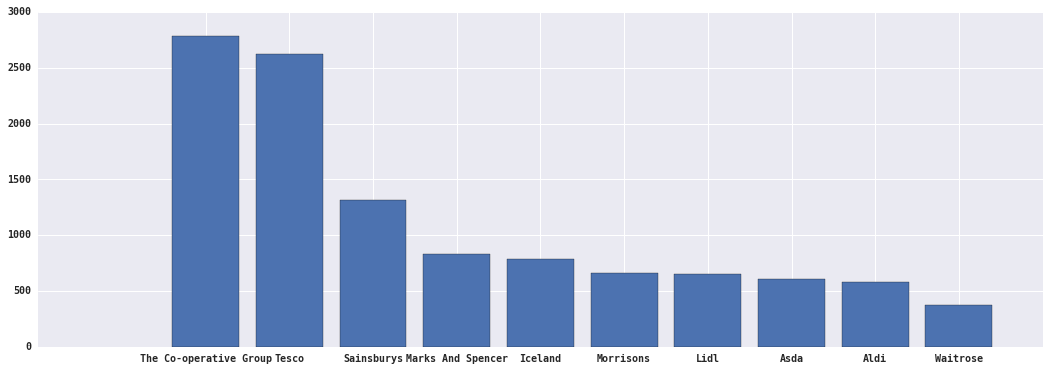

In [28]:
vc = supermarkets['Retailer'].value_counts()[:10]  # keep the top-10

idx = np.arange(len(vc.index))
plt.bar(
    idx, vc.values, tick_label=vc.index, align='center'
)

In [24]:
from ipywidgets import HTML

HTML('<iframe width="100%" height="520" frameborder="0" '
     'src="https://additionplus.cartodb.com/viz/cf091c2c-d4f0-11e5-a5e6-0ef24382571b/embed_map" '
     'allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen legend'
     '></iframe>')

### Enrich with the regional labour market data

[Regional labour market: LI02 - Local indicators for parliamentary constituencies, January 2016 (Excel sheet 314Kb)](http://www.ons.gov.uk/ons/rel/subnational-labour/regional-labour-market-statistics/january-2016/rft-lm-table-li02-january-2016.xls)

In [40]:
labour_market = pd.read_csv('regional_labour_market_li02_2016-01.csv').dropna()

In [42]:
labour_market.head()

,region_code,region,population,employment_total,employment_under_64,unemployment_total,unemployment_total_rate,economic_inactivity_total,economic_inactivity_under_64,claimant_level,claimant_proportion,labour_demand_total,labour_demand_job_density_under_64
0,K02000001,UNITED KINGDOM,"41,037","30,935",73.2,"1,784",5.5,"9,142",22.5,"831,440",2.0,"32,488",0.79
2,K03000001,GREAT BRITAIN,"39,866","30,120",73.4,"1,731",5.4,"8,819",22.3,"785,600",2.0,"31,654",0.80
4,E92000001,ENGLAND,"34,475","26,144",73.6,"1,472",5.3,"7,587",22.2,"657,638",1.9,"27,616",0.80
6,E12000001,NORTH EAST,"1,663","1,176",69.2,96,7.6,415,25.1,"49,176",3.0,"1,133",0.68
8,E14000554,Berwick-upon-Tweed,45,34,75.0,1,3.7,9,21.9,768,1.7,29,0.63


Join on town

In [46]:
joined = supermarkets.merge(labour_market, left_on='Town', right_on='region', how='outer')

In [51]:
labour_market[labour_market['region'] == 'Hatfield']

,region_code,region,population,employment_total,employment_under_64,unemployment_total,unemployment_total_rate,economic_inactivity_total,economic_inactivity_under_64,claimant_level,claimant_proportion,labour_demand_total,labour_demand_job_density_under_64
